# 03. IMDB LSTM (Long Short-Term Memory)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# IMDB 리뷰 데이터
from tensorflow.keras.datasets import imdb

In [32]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) 
# `num_words=500`: 사전에 있는 단어 중 가장 많이 등장하는 단어 상위 500개

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\anaconda3\envs\tf_cpu\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\anaconda3\envs\tf_cpu\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is 

In [33]:
print('train_input:', train_input.shape)
print('train_target:', train_target.shape)
print('test_input:', test_input.shape)
print('test_target:', test_target.shape)

train_input: (25000,)
train_target: (25000,)
test_input: (25000,)
test_target: (25000,)


In [34]:
# 첫 번째, 두 번째 댓글의 단어 수
print(len(train_input[0]), len(train_input[1]), len(train_input[2]))

218 189 141


In [35]:
# 숫자로 변환되어있는 텍스트
print(train_input[0])

# 1: 문장의 시작을 1로 알림
# 2: 상위 500개에 속하지 않는 단어

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [36]:
# target 데이터: 긍정 1, 부정 0
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [37]:
# 1(문장의 시작)과 2(500개에 속하지 않는 단어)는 데이터가 아니므로 훈련 세트에서 제외
for i in range(len(train_input)):
    train_input[i] = [w for w in train_input[i] if w > 2]

In [38]:
# 1과 2가 제거되었는지 확인
print(train_input[0])

[14, 22, 16, 43, 65, 458, 66, 4, 173, 36, 256, 5, 25, 100, 43, 112, 50, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 336, 385, 39, 4, 172, 17, 38, 13, 447, 4, 192, 50, 16, 6, 147, 19, 14, 22, 4, 469, 4, 22, 71, 87, 12, 16, 43, 38, 76, 15, 13, 4, 22, 17, 17, 12, 16, 18, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 16, 480, 66, 33, 4, 130, 12, 16, 38, 5, 25, 124, 51, 36, 135, 48, 25, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 8, 4, 107, 117, 15, 256, 4, 7, 5, 36, 71, 43, 476, 26, 400, 317, 46, 7, 4, 13, 104, 88, 4, 381, 15, 297, 98, 32, 56, 26, 141, 6, 194, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 88, 12, 16, 283, 5, 16, 113, 103, 32, 15, 16, 19, 178, 32]


<br><hr>

### 전처리

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train_input, val_input, train_target, val_target = train_test_split(train_input,
                                                                          train_target,
                                                                          test_size=0.2,
                                                                          random_state=42)

print('train_input:', train_input.shape)
print('train_target:', train_target.shape)
print('val_input:', val_input.shape)
print('val_target:', val_target.shape)

train_input: (20000,)
train_target: (20000,)
val_input: (5000,)
val_target: (5000,)


In [41]:
# 각 댓글마다 길이 정보를 가져와서 배열에 저장
lengths = np.array([len(x) for x in train_input])
print(len(lengths))
lengths  # 단어 (빈칸 포함)

20000


array([204, 307, 221, ..., 216,  51,  69])

In [42]:
# 리뷰에 포함된 단어의 평균 길이, 중위값 >> 평균과 중위수에 차이가 있음 >> 쏠림이 있음
print(np.mean(lengths), np.median(lengths))

164.67985 126.0


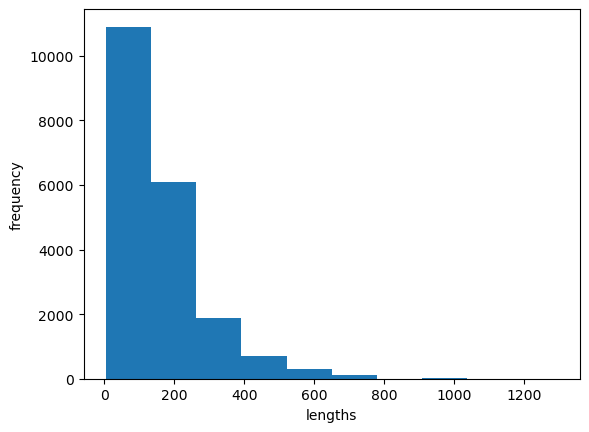

In [43]:
# lengths 시각화
plt.hist(lengths)

plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [45]:
# 시퀀스 데이터의 길이(단어의 수)를 맞춰줌
train_seq = pad_sequences(train_input,    # train_input에는 서로 다른 길이의 리뷰가 있고 그 리뷰들의 길이를 통일시키려 함
                          maxlen=100,     # 대부분의 리뷰 글들이 100개 안으로 들어오기 때문에 maxlen을 100으로 설정
                          padding='post')
train_seq.shape

(20000, 100)

In [46]:
# 100 단어로 설정한 데이터 확인
train_seq[101]  

array([ 14,   9,  34, 230,   4, 249,  20,  13,  28, 126, 110,  11,   4,
       438, 100,  24,  18,  12,   8, 130,   8,  97, 433,  12,   9, 348,
         6,  38,  25,  81,  24,  67, 259, 397, 324,  43,   8,   4,  60,
       397,  16,  46,  99, 111, 139,  71,   8,  11,   4,  17,  13, 104,
         4,  12,  62, 116,  16,  87,  21,  15,   5,   4,  85,  37, 299,
       191,  60,  16,  10,  10,  13,  62,  24, 106,  14,  18, 174,   5,
        13,  32, 409,  37, 332,  14,   8,  81,  43,   4, 172,  25,  28,
        77,   0,   0,   0,   0,   0,   0,   0,   0])

In [47]:
# 검증 데이터도 똑같이 적용
val_seq = pad_sequences(val_input, 
                        maxlen=100,
                        padding='post')
val_seq.shape

(5000, 100)

<br><hr>

### 순환 신경망 만들기

In [48]:
from tensorflow import keras

In [49]:
# 모델 생성
model = keras.Sequential()

# 자연어에 대한 추가적인 전처리 수행
model.add(keras.layers.Embedding(500, 16, input_length=100))

In [50]:
# LSTM 신경망 만들기
model.add(keras.layers.LSTM(8,                          # 사용할 뉴런의 개수 (정해진 값 없음)
                            input_shape=(100, 500)))    # 입력 데이터에 대한 shape (고정된 크기의 100개의 단어 안에 500개 단어가 있음 
model.add(keras.layers.Dense(units = 1,                 # 긍/부정 출력 하나
                             activation='sigmoid'))     # 다중분류가 아니라서 출력층에서 sigmoid 활성화 함수 사용

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 모델학습
model.compile(loss='binary_crossentropy',  # 이진분류
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics='accuracy')

In [53]:
# 모델을 파일의 형태로 저장한 후 새로운 데이터가 들어왔을 때 모델을 다시 학습시키지 않고 바로 적용하기
check_cb = keras.callbacks.ModelCheckpoint('best_LSTM_model.h5',   # 저장할 모델의 파일 이름
                                           save_best_only=True)  # 가장 좋은 성능을 보인 가중치만 저장
early_stopping = keras.callbacks.EarlyStopping(patience=3,                  # 모델이 더이상 개선되지 않을 때 바로 멈추지 않고 몇 번의 에포크를 기다릴지 설정
                                               restore_best_weights=True)  # 모델 학습이 중단되었을 때 값이 아닌 그 전에 최솟값이 나왔다면 그 값으로 저장

In [54]:
# 모델 저장
history = model.fit(train_seq,
                    train_target,
                    epochs=100,
                    batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[check_cb, early_stopping]
                   )

Epoch 1/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6916 - accuracy: 0.5488 - val_loss: 0.6898 - val_accuracy: 0.5724
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6818 - accuracy: 0.6004 - val_loss: 0.6447 - val_accuracy: 0.6812
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5797 - accuracy: 0.7451 - val_loss: 0.5552 - val_accuracy: 0.7666
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5371 - accuracy: 0.7745 - val_loss: 0.5337 - val_accuracy: 0.7740
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5151 - accuracy: 0.7866 - val_loss: 0.5166 - val_accuracy: 0.7814
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4958 - accuracy: 0.7943 - val_loss: 0.5026 - val_accuracy: 0.7826
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.4779 - accuracy: 0.8020 - val_loss: 0.4915 - val_accuracy:

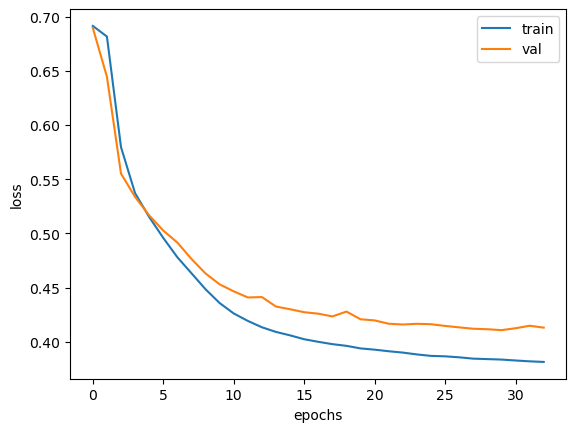

In [55]:
# 변수 history의 history 필드
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()